# Introduction
This project is a case study I did for the Google Data Analytics Certificate provided through the Coursera platform. This project is done for a BellaBeat, a high-tech manufacturing company that focuses on health-related products for women owned by Urška Sršen, the Chief Creative Officer, and Sando Mur who is a Mathematician and also Bellabeat’s cofounder. This task is focused on growing their market and also ensuring that they successfully become one of the leading player in the device market. This project is keen on analyzing the smart fitness device, gaining insights and providing a more structured marketing strategy. 
  

# Scenario
Task: 
Analyze smart device fitness data to help unlock new growth opportunites for Bellabeat.

1).Trends in smart device usage?
2).How do these trends apply to Bellabeat?
3).How can they help influence Bellabeat marketing strategy?

# Data Source
This is the data source provided by the company:

* [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic)): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

# Processing Data
**Tools for data processing/analysis:** I will be using RStudio for analysis and visualizations

In [8]:
##loading libraries
library(tidyverse)
library(lubridate)
library(ggplot2)
library(tidyr)
library(skimr)
library(janitor)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [19]:
##loading datasets
Daily_activity <- read.csv("../input/bella-beat-case-study/dailyActivity_merged.csv")
Daily_calories <- read.csv("../input/bella-beat-case-study/dailyCalories_merged.csv")
Daily_Steps <- read.csv("../input/bella-beat-case-study/dailySteps_merged.csv")
SleepDay <- read.csv("../input/bella-beat-case-study/sleepDay_merged.csv")


In [20]:
##reviewing datasets
head(Daily_activity)
head(Daily_calories)
head(Daily_Steps)
head(SleepDay)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


# Prepare Data

In [21]:
##data check
str(Daily_activity)
str(Daily_calories)
str(Daily_Steps)
str(SleepDay)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [22]:
#cleaning up date and time formats for a cleaner analysis
##Daily_activity
Daily_activity$ActivityDate = as.POSIXct(Daily_activity$ActivityDate, format = "%m/%d/%Y", tz=Sys.timezone())
Daily_activity$date <- format(Daily_activity$ActivityDate, format = "%m/%d/%y")

In [26]:
##Daily_calories
Daily_calories$ActivityDay = as.POSIXct(Daily_calories$ActivityDay, format = "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
Daily_calories$date <- format(Daily_calories$ActivityDay, format = "%m/%d/%y")

In [28]:
##Daily_Steps
Daily_Steps$ActivityDay = as.POSIXct(Daily_Steps$ActivityDay, format = "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
Daily_Steps$date <- format(Daily_Steps$ActivityDay, format = "%m/%d/%y")

In [31]:
##SleepDay
SleepDay$Date = as.POSIXct(SleepDay$SleepDay, format = "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
SleepDay$date = format(SleepDay$Date, format = "%m/%d/%y")
SleepDay$time = format(SleepDay$Date, format = "%H:%M:%S")

In [23]:
##data check
str(Daily_activity)

'data.frame':	940 obs. of  16 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 8

In [24]:
##Find duplicates
sum(duplicated(Daily_activity))
sum(duplicated(Daily_calories))
sum(duplicated(Daily_Steps))
sum(duplicated(SleepDay))

[1] 0

[1] 0

[1] 0

[1] 3

In [26]:
##clean duplicates
Sleep_2 <- SleepDay %>% distinct()

In [27]:
##double-checking to confirm duplicates removed
sum(duplicated(sleep))

[1] 0

In [28]:

##summary of Daily_activities
Daily_activity <- Daily_activity %>% 
  distinct() %>%
  drop_na()

In [30]:
##summary of Daily_calories
Daily_calories <- Daily_calories %>% 
  distinct() %>% 
  drop_na()

In [31]:
##summary of Daily_Steps
Daily_Steps <- Daily_Steps %>% 
  distinct() %>% 
  drop_na()

In [32]:
##summary of Sleep_2
Sleep_2%>%
  select(TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed)%>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

In [34]:
##merging tables
Daily_Activity_Sleep <- merge(Daily_activity, Sleep_2, by.id = "id" ,by.date ="date")

In [36]:
head(Daily_Activity_Sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,05/07/16,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,05/07/16,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,05/07/16,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,05/07/16,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,05/07/16,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,05/07/16,4/19/2016 12:00:00 AM,1,304,320


In [37]:
# Observing number of times FitBit users track their activity throughout the week
# Adding column for to use date information to add day of the week for analysis
Daily_activity <- Daily_activity %>% 
  mutate(weekday1 = weekdays(as.Date(ActivityDate, "%m/%d/%Y")))
glimpse(Daily_activity)

Rows: 940
Columns: 17
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <dttm> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [38]:

Daily_activity$weekday1 <- ordered(Daily_activity$weekday1, levels=c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
Activity <- Daily_activity %>% 
  group_by(weekday1) %>% 
  summarize(count_of = n())
glimpse(Activity)

Rows: 7
Columns: 2
$ weekday1 <ord> Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday
$ count_of <int> 120, 152, 150, 147, 126, 124, 121


In [42]:
daily_mean <- Daily_Activity_Sleep %>%
  group_by(Id) %>%
  summarise(mean_steps = mean(TotalSteps), mean_calories = mean(Calories), mean_sleep = mean(TotalMinutesAsleep))
head(daily_mean)

Id,mean_steps,mean_calories,mean_sleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12116.742,1816.419,360.2800
1644430081,7282.967,2811.300,294.0000
1844505072,2580.065,1573.484,652.0000
1927972279,916.129,2172.806,417.0000
2026352035,5566.871,1540.645,506.1786
2320127002,4716.871,1724.161,61.0000


In [45]:

#I categorized the means to emphasize the sizes of the results, using statistics from this website https://www.healthline.com/health/how-many-steps-a-day#How-many-steps-should-you-take-a-day?
#I will be using three categories; Inactive:Less than 5,000 steps a day, Average Active: 7,500-9000 steps a day and Very active: more than 12,500 a day.

user_type <- daily_mean %>%
  mutate(user_type = case_when(
    mean_steps < 5000 ~ "Inactive",
    mean_steps >= 5000 & mean_steps < 9000 ~ "Average active",
    mean_steps >= 9000 & mean_steps < 12500 ~ "Very active"
  ))
head(user_type)

Id,mean_steps,mean_calories,mean_sleep,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12116.742,1816.419,360.2800,Very active
1644430081,7282.967,2811.300,294.0000,Average active
1844505072,2580.065,1573.484,652.0000,Inactive
1927972279,916.129,2172.806,417.0000,Inactive
2026352035,5566.871,1540.645,506.1786,Average active
2320127002,4716.871,1724.161,61.0000,Inactive


In [49]:
#Let's convert to percentages
usertype_percentages <- user_type %>%
  group_by(user_type) %>%
  summarise(participants = n_distinct(Id)) %>%
  mutate(total_percentages = participants/sum(participants)) %>%
  mutate(total_percentages = scales::percent(total_percentages)) %>% 
  drop_na()

head(usertype_percentages)

user_type,participants,total_percentages
<chr>,<int>,<chr>
Average active,9,37.5%
Inactive,7,29.2%
Very active,7,29.2%


# Share Data Through Visualizations

`geom_smooth()` using formula 'y ~ x'

Saving 12.5 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



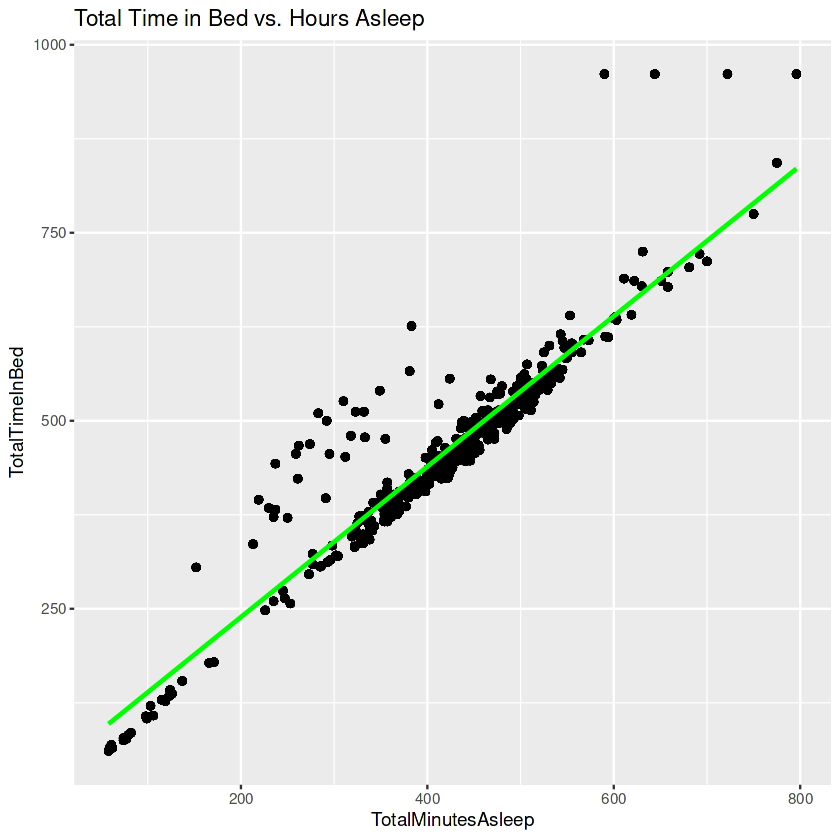

In [61]:
##total time in bed vs. hours asleep
ggplot(data=Daily_Activity_Sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point() + geom_smooth(method="lm",color="green") + labs(title = "Total Time in Bed vs. Hours Asleep")
# To save as png
ggsave("dataviz01.png")

In [58]:
#Let's categorize daily usage of the app 
Daily_usage <- Daily_Activity_Sleep %>%
  group_by(Id) %>%
  summarise(days_used = sum(n())) %>%
  mutate(usage = case_when(
    days_used >= 1 & days_used <= 40 ~ "Low",
    days_used >= 41 & days_used <= 800 ~ "Moderate",
    days_used >= 801 & days_used <= 1000 ~ "High"
  ))
head(Daily_usage)


Id,days_used,usage
<dbl>,<int>,<chr>
1503960366,775,Moderate
1644430081,120,Moderate
1844505072,93,Moderate
1927972279,155,Moderate
2026352035,868,High
2320127002,31,Low


In [59]:
#Let's plot the graph 
usage_percentage <- Daily_usage %>%
  group_by(usage) %>%
  summarise(participants = n_distinct(Id)) %>%
  mutate(total_percentages = participants/sum(participants)) %>%
  mutate(total_percentages = scales::percent(total_percentages))
head(usage_percentage)

usage,participants,total_percentages
<chr>,<int>,<chr>
High,8,33%
Low,1,4%
Moderate,15,62%


Saving 12.5 x 6.67 in image



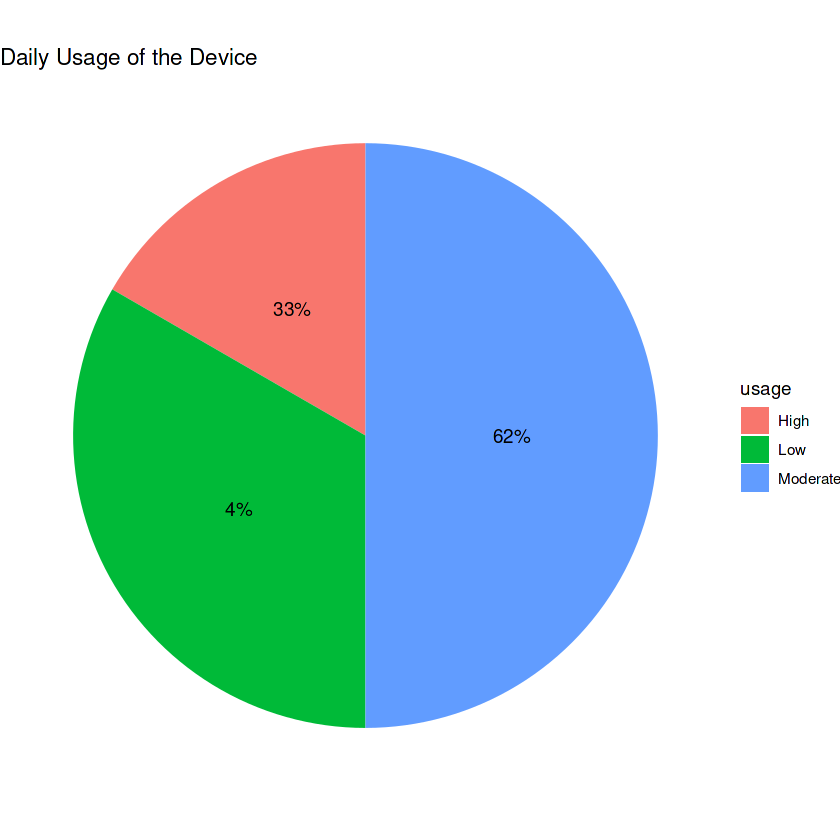

In [60]:
ggplot(usage_percentage, aes(x = "", y = total_percentages, fill = usage)) + 
  geom_bar(stat = "identity", width = 1) + 
  coord_polar("y", start = 0) +
  theme_void() + 
  geom_text(aes(label = total_percentages), position = position_stack(vjust = 0.5)) + 
  labs(title = "Daily Usage of the Device")
ggsave("dataviz02.png")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Saving 12.5 x 6.67 in image

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



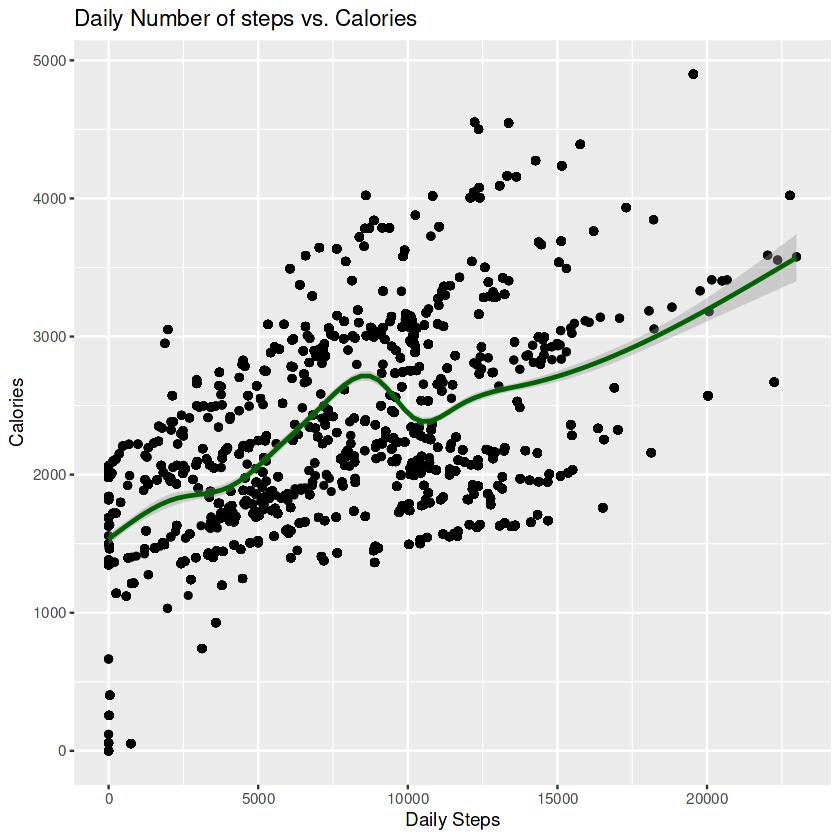

In [51]:
#Correlation between daily steps and the number of calories
ggplot(Daily_Activity_Sleep, aes(x = TotalSteps, y = Calories)) + 
  geom_jitter() + 
  geom_smooth(color = "darkgreen") +
  labs(title = "Daily Number of steps vs. Calories", x = "Daily Steps", y = "Calories")
ggsave("dataviz03.png")

**This graph shows that there is a positive correlation between the number of steps taken and the amount of calories burned, while on the other hand, there is no correlation between the number of sleep and steps taken by the users.**

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Saving 12.5 x 6.67 in image

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



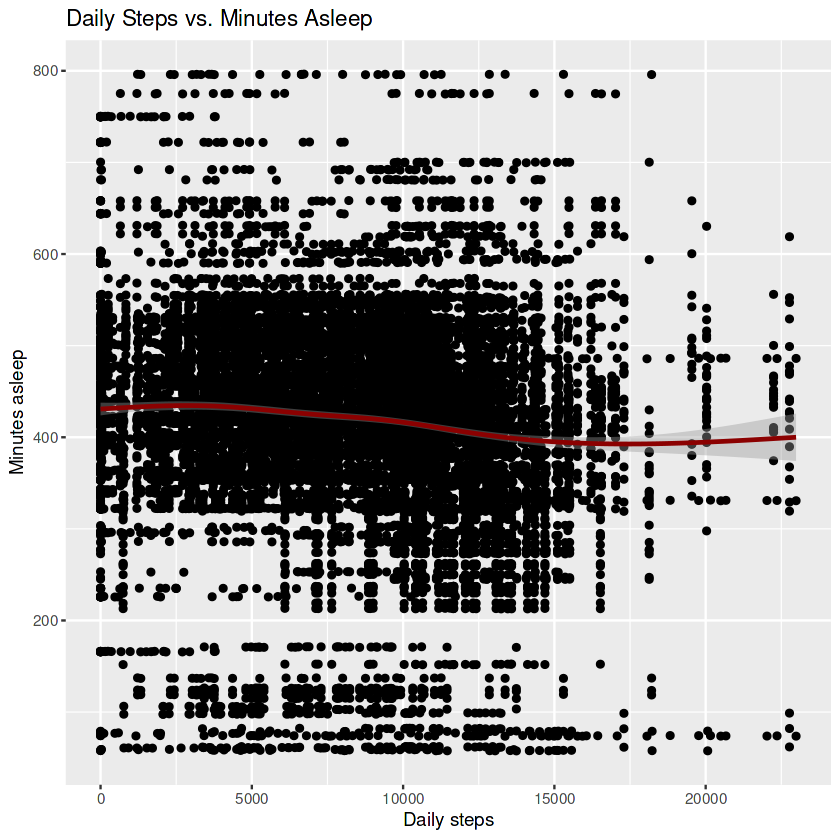

In [53]:
#Correlation between daily steps and minutes asleep
ggplot(Daily_Activity_Sleep, aes(x = TotalSteps, y = TotalMinutesAsleep)) + 
  geom_jitter() + 
  geom_smooth(color = "darkred") + 
  labs(title = "Daily Steps vs. Minutes Asleep" , x = "Daily steps" , y = "Minutes asleep")
ggsave("dataviz04.png")

## Business Marketing Strategy Recommendations
Based off of our FitBit user data analysis, here are our recommendations for the Bellabeat marketing strategy team and stakeholders:

As shown in the dataset provided, here are some of my recommendations for the company:

**Bellabeat should encourage its users to stay more active on the app by offering incentives such as giving points that can be reedemable for special items after reaching a certain goal.** 

**Bellabeat should encourage their users to sleep well at night and they can set up a platform where users can set alarm for certain time of the night to either do activities or stop them.**

**Since this is an health app, they should incorporate tracking menstrual cycles for women users so they can be able to track their reproductive health.** 

**Bellabeat should look more into providing in app support such as quick access to a portal to where they can speak to trained health professionals regarding their health status to their users which would in turn lead to the promotion of a healthy lifestyle.
For membership program offer educational support by certified trainers and nutritionists that can help with activities and recipes for meals, meal prep and meal delivery services.

Thank you so much for your time and attention. 


In [ ]:
dev.off()